# Visualize Analog Forecasts

Run the analog forecast algorithm using the cell below, then visualize results.

In [1]:
%%time
from analog_forecast import find_analogs, make_forecast
from config import data_dir

varname = input("Variable name: ") or "t2m"
spatial_domain = input("Spatial domain: ") or "alaska"
ref_date = input("Reference date (YYYY-mm-dd): ") or "2021-07-01"

analogs = find_analogs(varname, ref_date, spatial_domain, data_dir, 16)
forecast = make_forecast(analogs, varname, ref_date, spatial_domain, data_dir)

Variable name:  
Spatial domain:  
Reference date (YYYY-mm-dd):  


   Top 5 Analogs: 
Rank 1:   Date: 1987-07-18;  RMSE: 1.762
Rank 2:   Date: 2021-06-26;  RMSE: 1.785
Rank 3:   Date: 2018-07-11;  RMSE: 1.786
Rank 4:   Date: 2000-07-08;  RMSE: 1.835
Rank 5:   Date: 1968-07-04;  RMSE: 1.852
CPU times: user 12.5 s, sys: 14.1 s, total: 26.7 s
Wall time: 28.7 s


Plot the difference between forecast and observed:

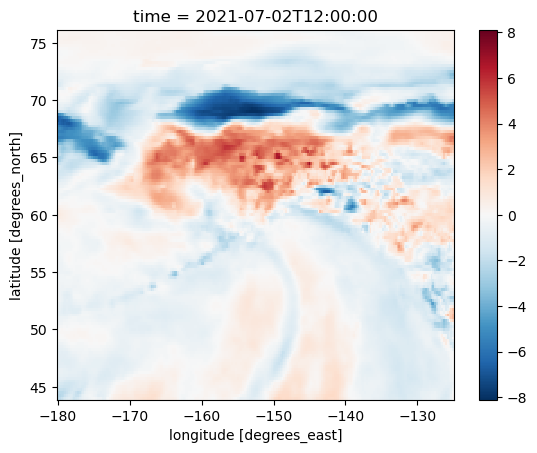

In [21]:
import luts
import xarray as xr


# get the bbox for composite mean/"forecast"
bbox = luts.spatial_domains[spatial_domain]["bbox"]

# get filepath to data file used
fp = data_dir.joinpath(luts.varnames_lu[varname]["filename"])

with xr.open_dataset(fp) as ds:
    ds = ds.sel(
        latitude=slice(bbox[3], bbox[1]),
        longitude=slice(bbox[0], bbox[2])
    )
    forecast_date = forecast.time.dt.date.values[0]
    (ds[varname].sel(time=str(forecast_date)) - forecast.sel(time=str(forecast_date))).plot()